In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
dark_horse = cv2.imread('horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

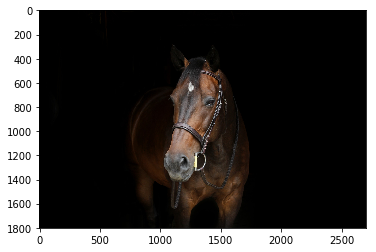

In [4]:
plt.imshow(show_horse)

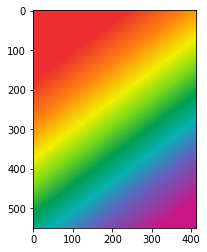

In [5]:
plt.imshow(show_rainbow)

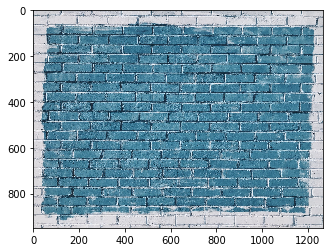

In [7]:
plt.imshow(show_bricks)

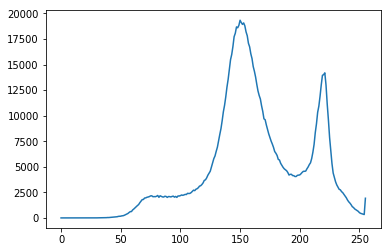

In [10]:
#We are showing histogram of blue color. In OpenCV, the mapping is BGR so Blue is channel 0.
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values)

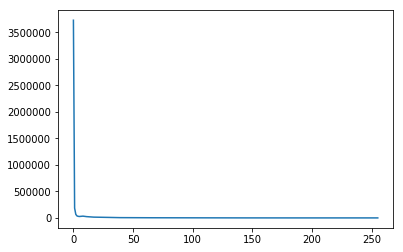

In [11]:
#In horse image, most of the pic is black. There is a small bump near 0. That is the only contribution.
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values)

Text(0.5,1,'Histogram for blue bricks')

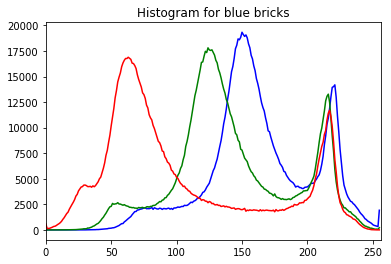

In [12]:
img = blue_bricks
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Histogram for blue bricks")

Text(0.5,1,'Histogram for horse')

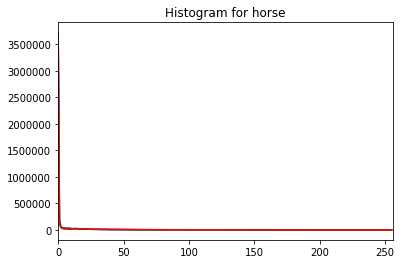

In [13]:
img = dark_horse
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title("Histogram for horse")

Text(0.5,1,'Histogram for blue bricks')

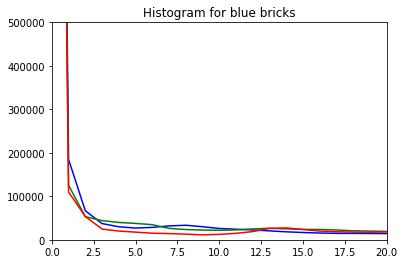

In [14]:
img = dark_horse
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,20])
    plt.ylim([0, 500000])
plt.title("Histogram for blue bricks")

In [15]:
img = rainbow
img.shape

(550, 413, 3)

In [19]:
img.shape[:2]

(550, 413)

In [20]:
mask = np.zeros(img.shape[:2], np.uint8)

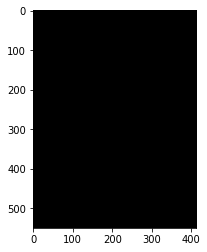

In [22]:
plt.imshow(mask, cmap='gray')

In [26]:
mask[300:400, 100:400] = 255

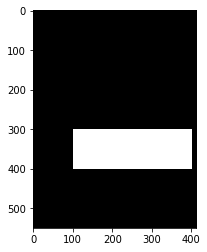

In [27]:
plt.imshow(mask, cmap='gray')

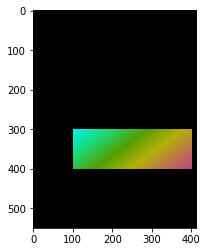

In [28]:
masked_img = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(masked_img)

In [32]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_values_red = cv2.calcHist([rainbow],channels=[2], mask=None, histSize=[256], ranges=[0,256])

Text(0.5,1,'Histogram for masked image')

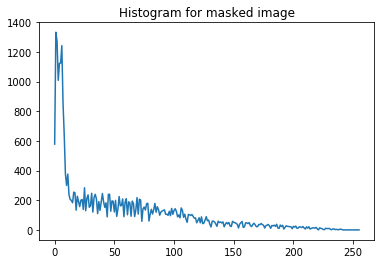

In [35]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for masked image')

Text(0.5,1,'Histogram for unmasked image')

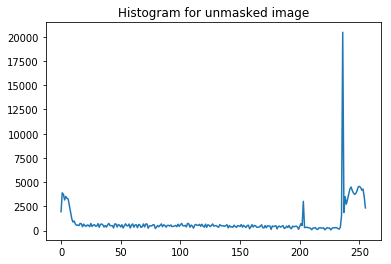

In [36]:
plt.plot(hist_values_red)
plt.title('Histogram for unmasked image')

# Histogram Equalization

In [42]:
img = cv2.imread('gorilla.jpg', 0)
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

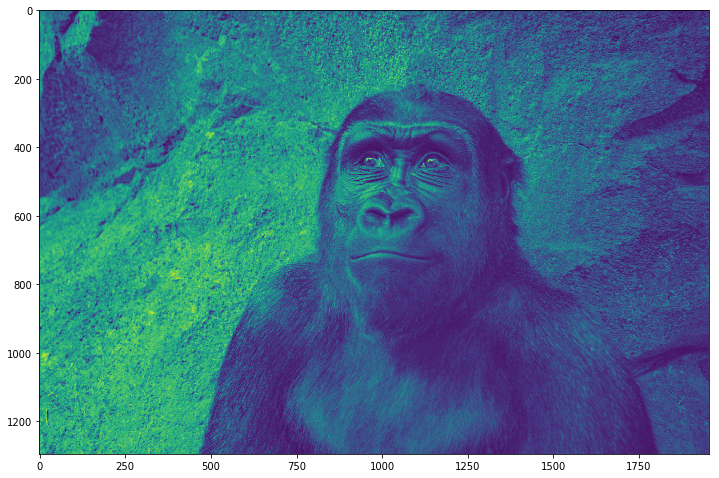

In [43]:
display_img(img)

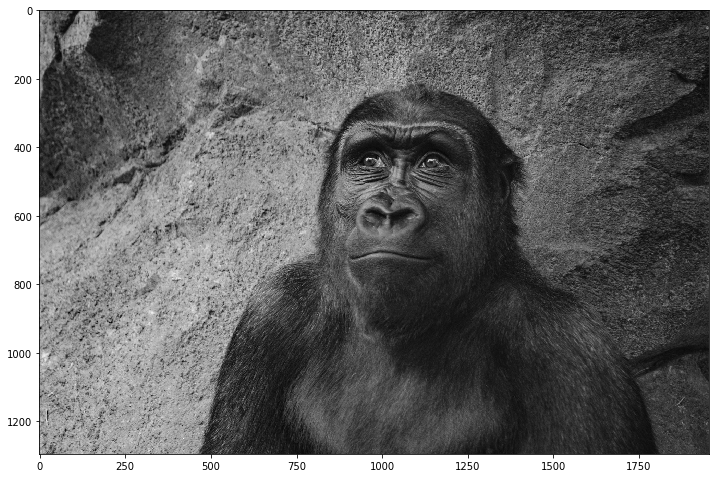

In [44]:
display_img(img, cmap='gray')

In [45]:
img.shape

(1295, 1955)

In [46]:
hist_values = cv2.calcHist([img],channels=[0], mask=None, histSize=[256], ranges=[0,256])

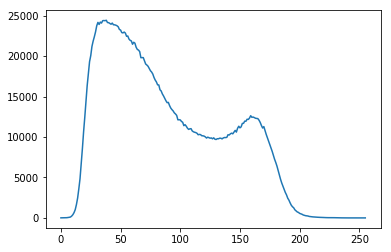

In [47]:
plt.plot(hist_values)

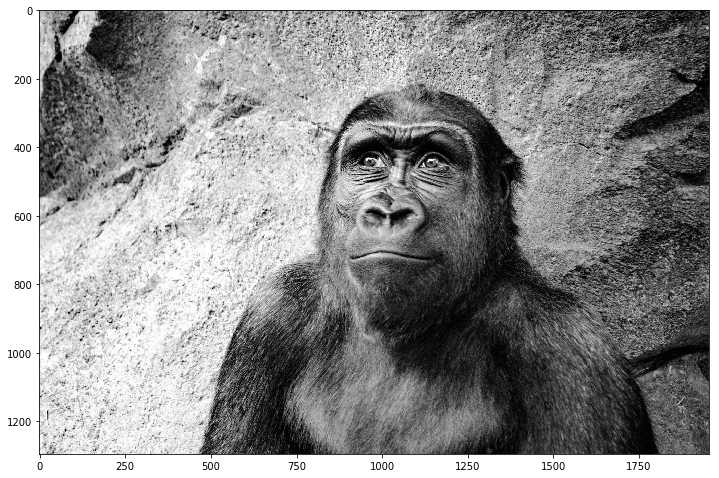

In [49]:
eq_img = cv2.equalizeHist(img)
display_img(eq_img, cmap='gray')

In [50]:
eq_hist_values = cv2.calcHist([eq_img],channels=[0], mask=None, histSize=[256], ranges=[0,256])

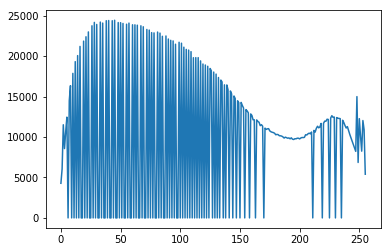

In [51]:
plt.plot(eq_hist_values)

In [52]:
color_gorilla = cv2.imread('gorilla.jpg')

In [54]:
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

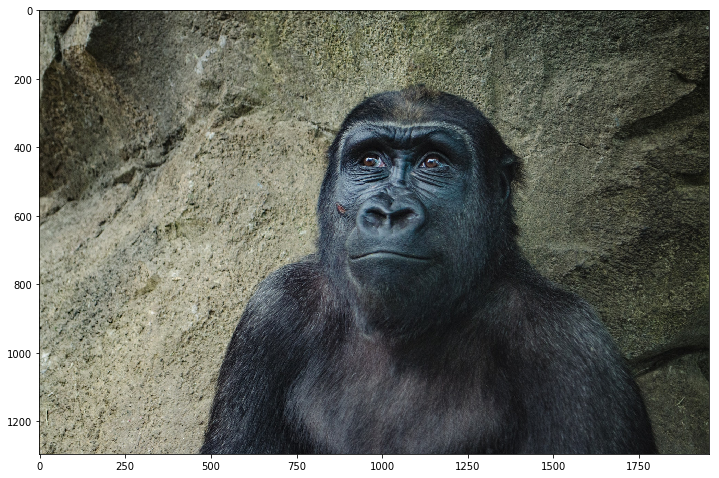

In [55]:
display_img(show_gorilla)

### Histogram equalization for color image
For that first we need to change the color space to HSV

In [56]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

We need to equvalize the value channel which is the third one

In [57]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [58]:
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

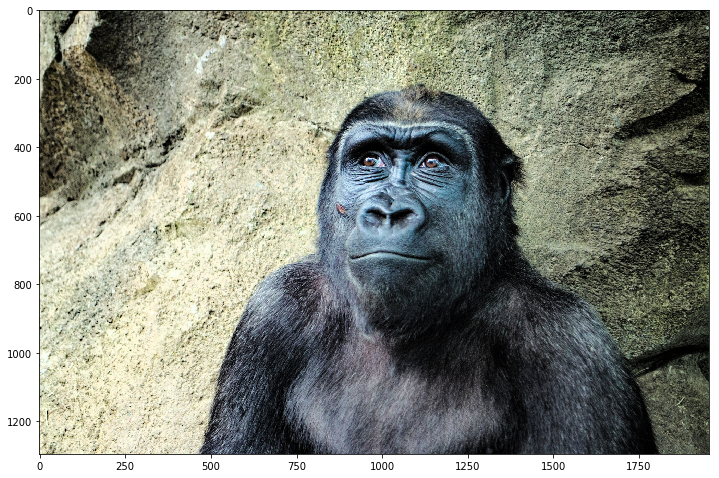

In [59]:
display_img(eq_color_gorilla)